### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [100]:
import pandas as pd

co_df = pd.read_csv('./datasets/customer_order_data.csv')
co_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [101]:
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [102]:
co_df.isna().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [103]:
co_df.describe().sum()

CustomerID           3.679455e+04
TransactionAmount    4.351892e+03
OrderID              3.580434e+06
dtype: float64

In [104]:
# 컬럼 이름 변경 
co_df.columns = ['ID', 'Date', 'Amount', 'Information', 'OlderID', 'City']
co_df

,ID,Date,Amount,Information,OlderID,City
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [105]:
co_df[['Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,1000.0,513.67781,286.0987,12.13,257.12,523.565,759.86,999.44


In [106]:
co_df.sort_values(by='Date', ascending=False)

,ID,Date,Amount,Information,OlderID,City
999,4759,2023-06-10,804.28,Product D,467544,New York
990,6570,2023-06-10,125.84,Product C,664032,Paris
981,6761,2023-06-10,571.97,Product B,690462,London
982,3213,2023-06-10,700.65,Product B,719531,Tokyo
983,2625,2023-06-10,765.11,Product B,377501,New York
...,...,...,...,...,...,...
1,2188,2023-04-11,463.70,Product A,176819,London
5,8483,2023-04-11,375.23,Product C,691194,Paris
6,8317,2023-04-11,272.56,Product B,826847,New York
7,6911,2023-04-11,433.33,Product C,963918,Tokyo


In [107]:
# Recency 컬럼 추가 
co_df['Recency'] = pd.to_datetime(co_df['Date']).apply(lambda x: (pd.to_datetime('2023-06-11') - x).days)
co_df

,ID,Date,Amount,Information,OlderID,City,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,61
1,2188,2023-04-11,463.70,Product A,176819,London,61
2,4608,2023-04-11,80.28,Product A,340062,New York,61
3,2559,2023-04-11,221.29,Product A,239145,London,61
4,9482,2023-04-11,739.56,Product A,194545,Paris,61
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1
996,6669,2023-06-10,941.50,Product C,987025,New York,1
997,8836,2023-06-10,545.36,Product C,512842,London,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,1


In [108]:
co_df['Information'].value_counts()

Information
Product C    277
Product D    253
Product B    245
Product A    225
Name: count, dtype: int64

In [109]:
co_df['ID'].value_counts()

ID
7363    3
4804    3
5557    3
1519    2
5634    2
       ..
1341    1
8822    1
9442    1
5706    1
4759    1
Name: count, Length: 946, dtype: int64

In [110]:
# 고객별 Recency, Frequency, Monetary
rfm_r = co_df.groupby('ID')['Recency'].min().reset_index()
rfm_r.columns = ['ID', 'Recency']

rfm_f = co_df['ID'].value_counts().reset_index()
rfm_f.columns = ['ID', 'Frequency']

rfm_m = co_df.groupby('ID')['Amount'].sum().reset_index()
rfm_m.columns = ['ID', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='ID')
rfm = pd.merge(rfm, rfm_m, on='ID')

rfm

,ID,Recency,Frequency,Monetary
0,1011,34,2,1129.02
1,1025,22,1,359.29
2,1029,1,1,704.99
3,1046,44,1,859.82
4,1049,14,1,225.72
...,...,...,...,...
941,9941,43,1,960.53
942,9950,39,1,679.11
943,9954,13,1,798.01
944,9985,58,1,36.10


In [111]:
# 스케일링 (합이 1이 되도록 만들어주기)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm['Recency'] = 1 - rfm['Recency']

rfm

,ID,Recency,Frequency,Monetary
0,1011,0.450000,0.5,0.471795
1,1025,0.650000,0.0,0.146647
2,1029,1.000000,0.0,0.292677
3,1046,0.283333,0.0,0.358080
4,1049,0.783333,0.0,0.090224
...,...,...,...,...
941,9941,0.300000,0.0,0.400622
942,9950,0.366667,0.0,0.281745
943,9954,0.800000,0.0,0.331970
944,9985,0.050000,0.0,0.010125


In [112]:
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,ID,Recency,Frequency,Monetary,TotalScore
0,1011,0.450000,0.5,0.471795,1.421795
1,1025,0.650000,0.0,0.146647,0.796647
2,1029,1.000000,0.0,0.292677,1.292677
3,1046,0.283333,0.0,0.358080,0.641413
4,1049,0.783333,0.0,0.090224,0.873558
...,...,...,...,...,...
941,9941,0.300000,0.0,0.400622,0.700622
942,9950,0.366667,0.0,0.281745,0.648411
943,9954,0.800000,0.0,0.331970,1.131970
944,9985,0.050000,0.0,0.010125,0.060125


In [113]:
co_rfm_df = pd.merge(co_df, rfm, on='ID')
co_rfm_df

,ID,Date,Amount,Information,OlderID,City,Recency_x,Recency_y,Frequency,Monetary,TotalScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,61,1.110223e-16,0.0,0.393348,0.393348
1,2188,2023-04-11,463.70,Product A,176819,London,61,1.110223e-16,0.0,0.190752,0.190752
2,4608,2023-04-11,80.28,Product A,340062,New York,61,1.110223e-16,0.0,0.028788,0.028788
3,2559,2023-04-11,221.29,Product A,239145,London,61,1.110223e-16,0.0,0.088353,0.088353
4,9482,2023-04-11,739.56,Product A,194545,Paris,61,1.110223e-16,0.0,0.307280,0.307280
...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1,1.000000e+00,0.0,0.315754,1.315754
996,6669,2023-06-10,941.50,Product C,987025,New York,1,1.000000e+00,0.0,0.392583,1.392583
997,8836,2023-06-10,545.36,Product C,512842,London,1,1.000000e+00,0.0,0.225246,1.225246
998,1440,2023-06-10,729.94,Product B,559753,Paris,1,1.000000e+00,0.0,0.303216,1.303216


In [114]:
import numpy as np

l1, l2 = np.percentile(co_rfm_df['TotalScore'], [40, 90])
print(l1, l2)

0.6500394257359942 1.3033258706047346


In [115]:
def get_level(x):
    if x <= l1:
        return 3
    if x <= l2:
        return 2
    return 1
    

In [116]:
co_rfm_df['level'] = co_rfm_df['TotalScore'].apply(get_level)

co_rfm_df['level'] = co_rfm_df['level'].replace([3,2,1], ['Bronze', 'Silver', 'Gold'])
co_rfm_df

,ID,Date,Amount,Information,OlderID,City,Recency_x,Recency_y,Frequency,Monetary,TotalScore,level
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,61,1.110223e-16,0.0,0.393348,0.393348,Bronze
1,2188,2023-04-11,463.70,Product A,176819,London,61,1.110223e-16,0.0,0.190752,0.190752,Bronze
2,4608,2023-04-11,80.28,Product A,340062,New York,61,1.110223e-16,0.0,0.028788,0.028788,Bronze
3,2559,2023-04-11,221.29,Product A,239145,London,61,1.110223e-16,0.0,0.088353,0.088353,Bronze
4,9482,2023-04-11,739.56,Product A,194545,Paris,61,1.110223e-16,0.0,0.307280,0.307280,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1,1.000000e+00,0.0,0.315754,1.315754,Gold
996,6669,2023-06-10,941.50,Product C,987025,New York,1,1.000000e+00,0.0,0.392583,1.392583,Gold
997,8836,2023-06-10,545.36,Product C,512842,London,1,1.000000e+00,0.0,0.225246,1.225246,Silver
998,1440,2023-06-10,729.94,Product B,559753,Paris,1,1.000000e+00,0.0,0.303216,1.303216,Silver


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns 

order = ['Bronze', 'Silver', 'Gold']

co_rfm_df['level'].value_counts()

level
Silver    500
Bronze    400
Gold      100
Name: count, dtype: int64

/var/folders/rs/pmsg7qg54zqbpwk2zvchs6br0000gn/T/ipykernel_76953/4076825376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data= co_rfm_df, palette='muted', order=order)


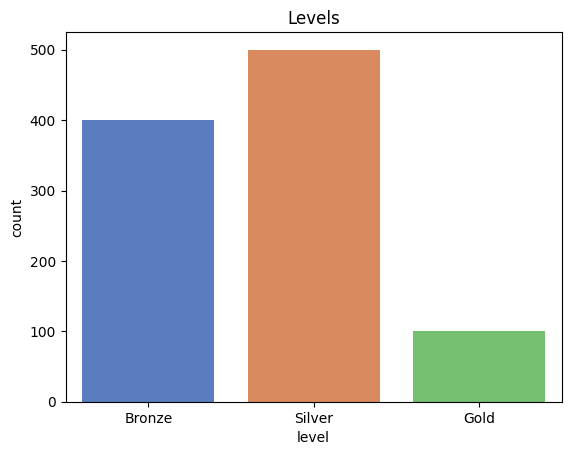

In [118]:
sns.countplot(x='level', data= co_rfm_df, palette='muted', order=order)
plt.title('Levels')
plt.show()

In [121]:
co_rfm_df['City'].value_counts()

City
Tokyo       278
New York    247
London      246
Paris       229
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='Amount'>

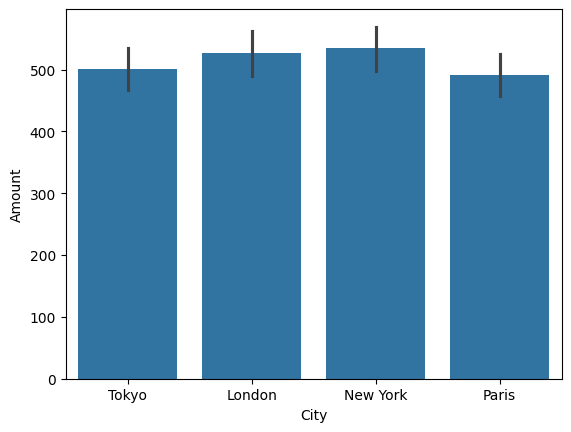

In [124]:
sns.barplot(x='City', y='Amount', data=co_rfm_df)

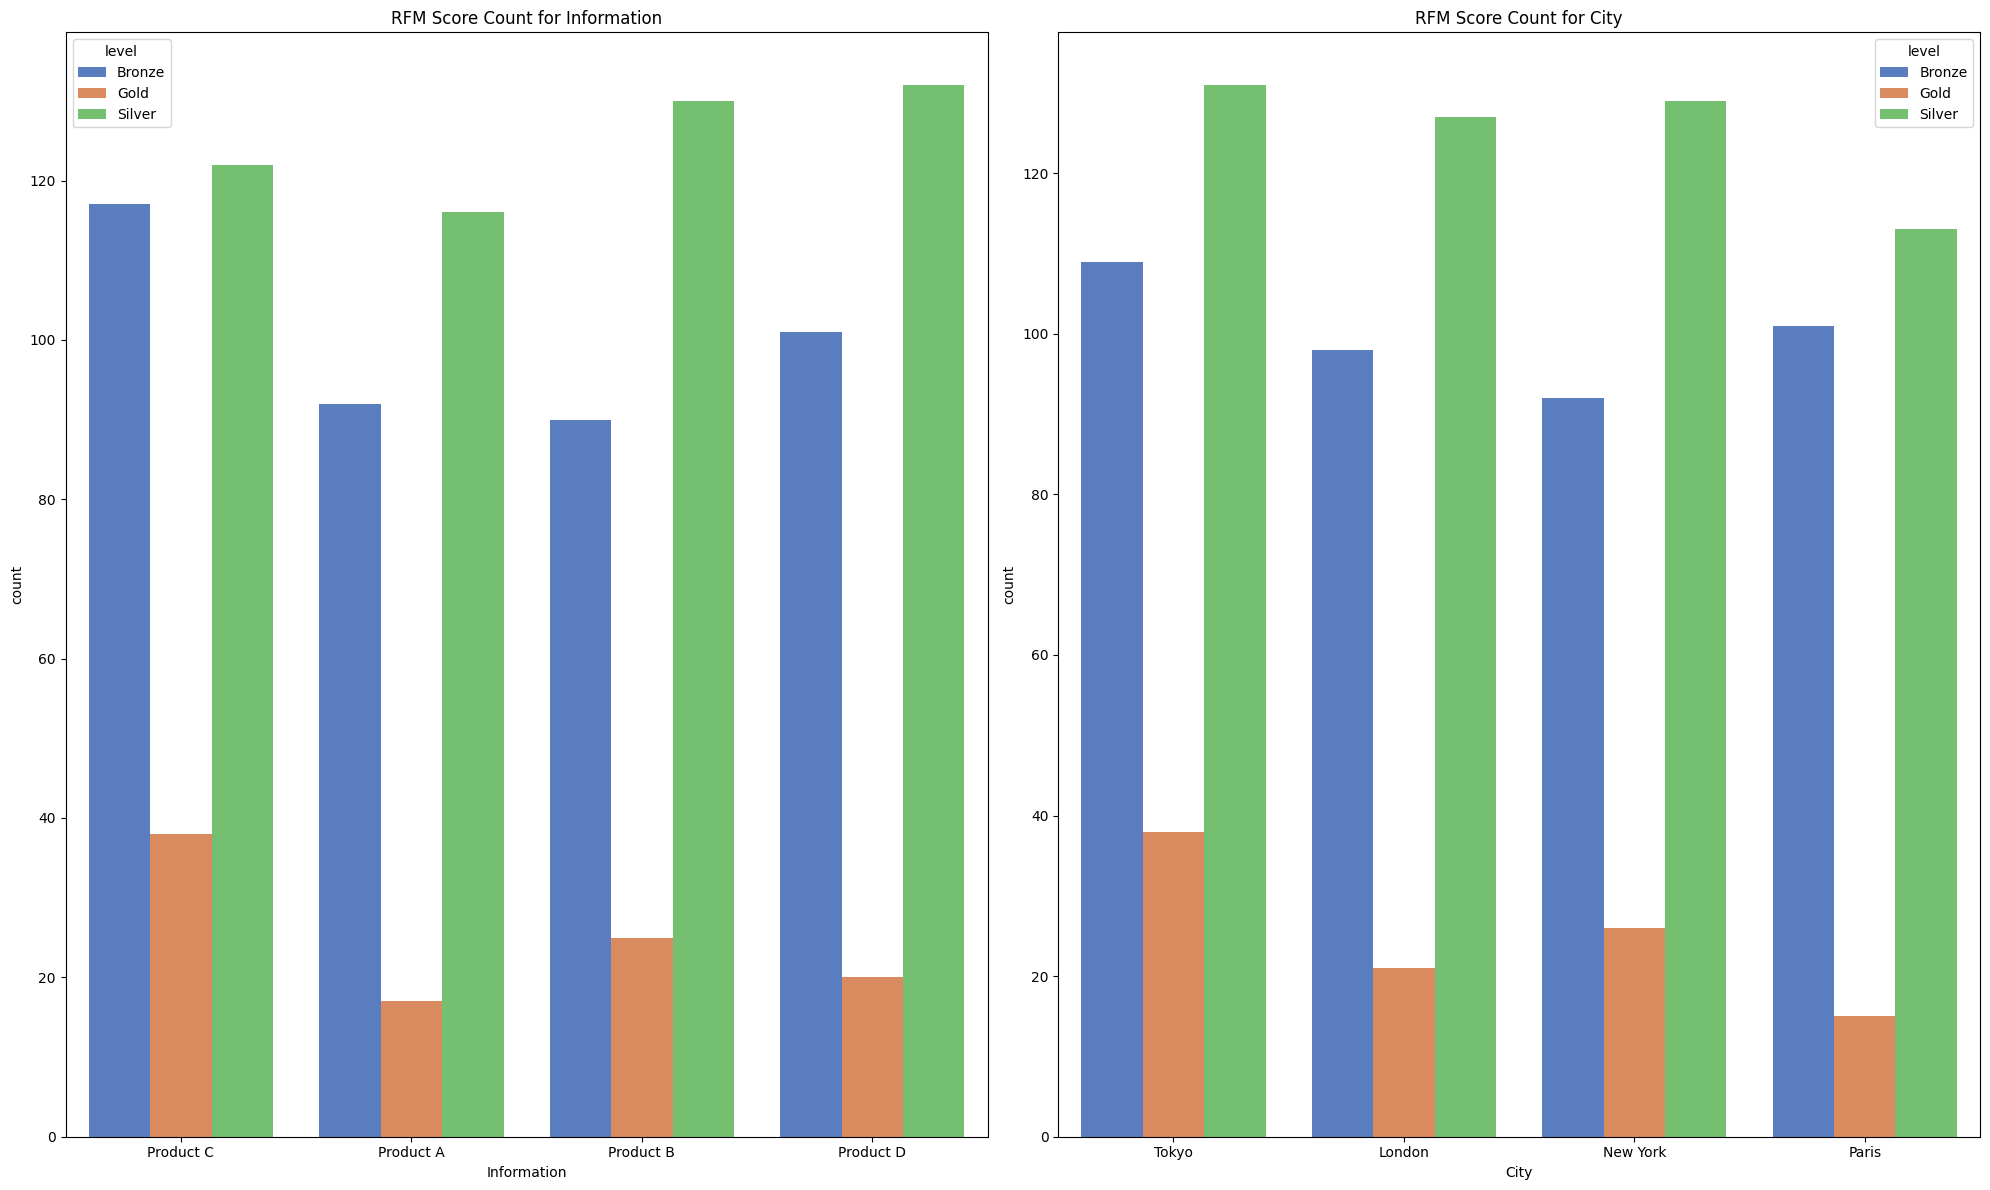

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

for i, col in enumerate(['Information', 'City']):
    sns.countplot(ax=axes[i], x=col, hue='level', data=co_rfm_df, palette='muted')
    axes[i].set_title(f'RFM Score Count for {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()
